# Phân tích dữ liệu thông minh - Dataset Tỷ phú

## Mục tiêu:
- Khám phá và phân tích dữ liệu về các tỷ phú trên thế giới
- Tìm hiểu mối quan hệ giữa tài sản và các chỉ số kinh tế - xã hội
- Phân tích theo quốc gia, ngành nghề, giới tính, và các yếu tố khác


In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Đã import các thư viện thành công!")


Đã import các thư viện thành công!


In [2]:
!pwd

/home/v1nk4n/Working/IDA_PA


In [3]:
# Đọc dữ liệu
df = pd.read_csv('Billionaires Statistics Dataset.csv')

print(f"Kích thước dataset: {df.shape}")
print(f"\nSố lượng tỷ phú: {len(df)}")
print(f"Số lượng cột: {len(df.columns)}")
print("\n" + "="*50)
print("Thông tin cơ bản về dataset:")
print("="*50)
df.info()


Kích thước dataset: (2640, 35)

Số lượng tỷ phú: 2640
Số lượng cột: 35

Thông tin cơ bản về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null

In [6]:
# Hiển thị 5 dòng đầu tiên
print("5 dòng đầu tiên của dataset:")
df.head()


5 dòng đầu tiên của dataset:


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [7]:
# Thống kê mô tả cho các cột số
print("="*50)
print("THỐNG KÊ MÔ TẢ")
print("="*50)
df.describe()


THỐNG KÊ MÔ TẢ


,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [8]:
# Kiểm tra dữ liệu thiếu
print("="*50)
print("KIỂM TRA DỮ LIỆU THIẾU")
print("="*50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Số lượng thiếu': missing_data,
    'Tỷ lệ (%)': missing_percent
})
missing_df = missing_df[missing_df['Số lượng thiếu'] > 0].sort_values('Số lượng thiếu', ascending=False)
print(missing_df)


KIỂM TRA DỮ LIỆU THIẾU
                                            Số lượng thiếu  Tỷ lệ (%)
organization                                          2315  87.689394
title                                                 2301  87.159091
residenceStateRegion                                  1893  71.704545
state                                                 1887  71.477273
cpi_change_country                                     184   6.969697
cpi_country                                            184   6.969697
tax_revenue_country_country                            183   6.931818
gross_tertiary_education_enrollment                    182   6.893939
total_tax_rate_country                                 182   6.893939
life_expectancy_country                                182   6.893939
gross_primary_education_enrollment_country             181   6.856061
longitude_country                                      164   6.212121
population_country                                     164   6.2121

## 1. Phân tích tổng quan về tài sản


In [9]:
# Phân tích tài sản (finalWorth)
print("="*50)
print("PHÂN TÍCH TÀI SẢN (tỷ USD)")
print("="*50)
print(f"Tổng tài sản: ${df['finalWorth'].sum():,.0f} triệu USD")
print(f"Tài sản trung bình: ${df['finalWorth'].mean():,.0f} triệu USD")
print(f"Tài sản trung vị: ${df['finalWorth'].median():,.0f} triệu USD")
print(f"Tài sản tối đa: ${df['finalWorth'].max():,.0f} triệu USD")
print(f"Tài sản tối thiểu: ${df['finalWorth'].min():,.0f} triệu USD")
print(f"\nTop 10 tỷ phú giàu nhất:")
top_10 = df.nlargest(10, 'finalWorth')[['rank', 'personName', 'finalWorth', 'country', 'category']]
print(top_10.to_string(index=False))


PHÂN TÍCH TÀI SẢN (tỷ USD)
Tổng tài sản: $12,206,800 triệu USD
Tài sản trung bình: $4,624 triệu USD
Tài sản trung vị: $2,300 triệu USD
Tài sản tối đa: $211,000 triệu USD
Tài sản tối thiểu: $1,000 triệu USD

Top 10 tỷ phú giàu nhất:
 rank                personName  finalWorth       country              category
    1  Bernard Arnault & family      211000        France      Fashion & Retail
    2                 Elon Musk      180000 United States            Automotive
    3                Jeff Bezos      114000 United States            Technology
    4             Larry Ellison      107000 United States            Technology
    5            Warren Buffett      106000 United States Finance & Investments
    6                Bill Gates      104000 United States            Technology
    7         Michael Bloomberg       94500 United States Media & Entertainment
    8 Carlos Slim Helu & family       93000        Mexico               Telecom
    9             Mukesh Ambani       83400     

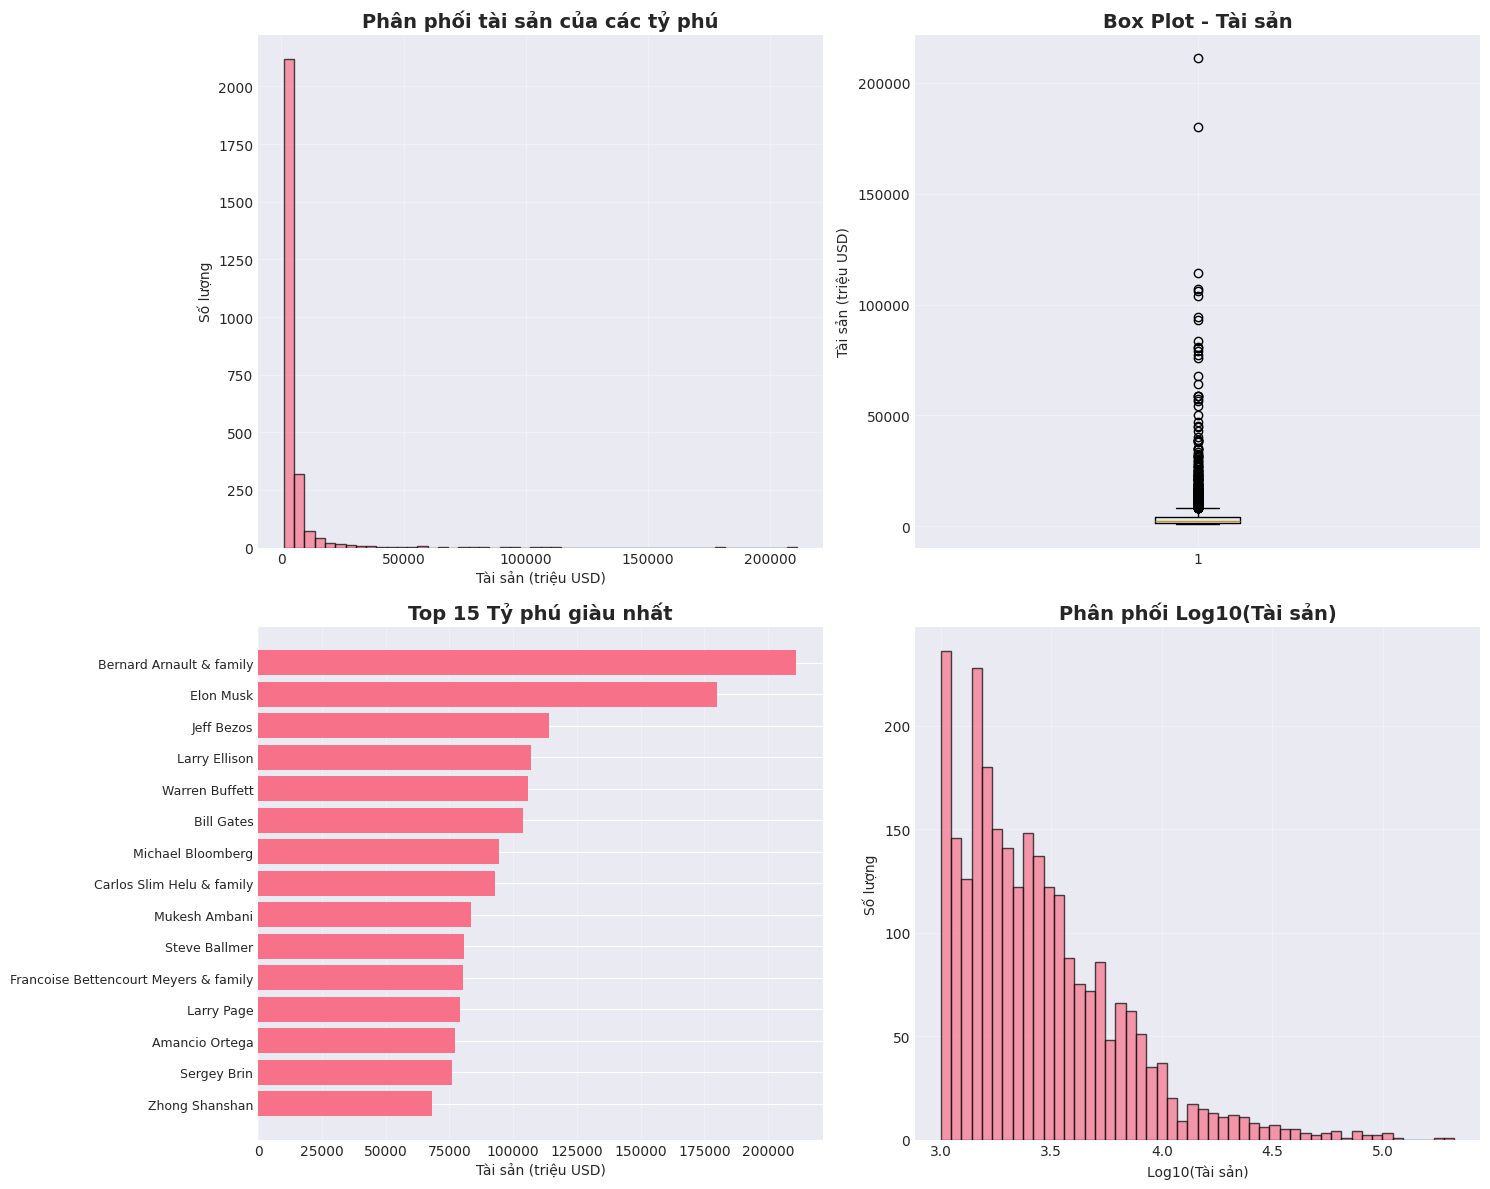

In [10]:
# Biểu đồ phân phối tài sản
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram tài sản
axes[0, 0].hist(df['finalWorth'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Phân phối tài sản của các tỷ phú', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Tài sản (triệu USD)')
axes[0, 0].set_ylabel('Số lượng')
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot tài sản
axes[0, 1].boxplot(df['finalWorth'], vert=True)
axes[0, 1].set_title('Box Plot - Tài sản', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Tài sản (triệu USD)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Top 15 tỷ phú giàu nhất
top_15 = df.nlargest(15, 'finalWorth')
axes[1, 0].barh(range(len(top_15)), top_15['finalWorth'].values)
axes[1, 0].set_yticks(range(len(top_15)))
axes[1, 0].set_yticklabels(top_15['personName'].values, fontsize=9)
axes[1, 0].set_title('Top 15 Tỷ phú giàu nhất', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Tài sản (triệu USD)')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Phân phối log của tài sản (để dễ nhìn hơn)
axes[1, 1].hist(np.log10(df['finalWorth']), bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Phân phối Log10(Tài sản)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Log10(Tài sản)')
axes[1, 1].set_ylabel('Số lượng')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 2. Phân tích theo Quốc gia


In [11]:
# Phân tích theo quốc gia
country_stats = df.groupby('country').agg({
    'finalWorth': ['count', 'sum', 'mean'],
    'personName': 'count'
}).round(2)
country_stats.columns = ['Số lượng', 'Tổng tài sản (triệu USD)', 'Tài sản TB (triệu USD)']
country_stats = country_stats.sort_values('Số lượng', ascending=False)

print("="*50)
print("TOP 20 QUỐC GIA CÓ NHIỀU TỶ PHÚ NHẤT")
print("="*50)
print(country_stats.head(20))


ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

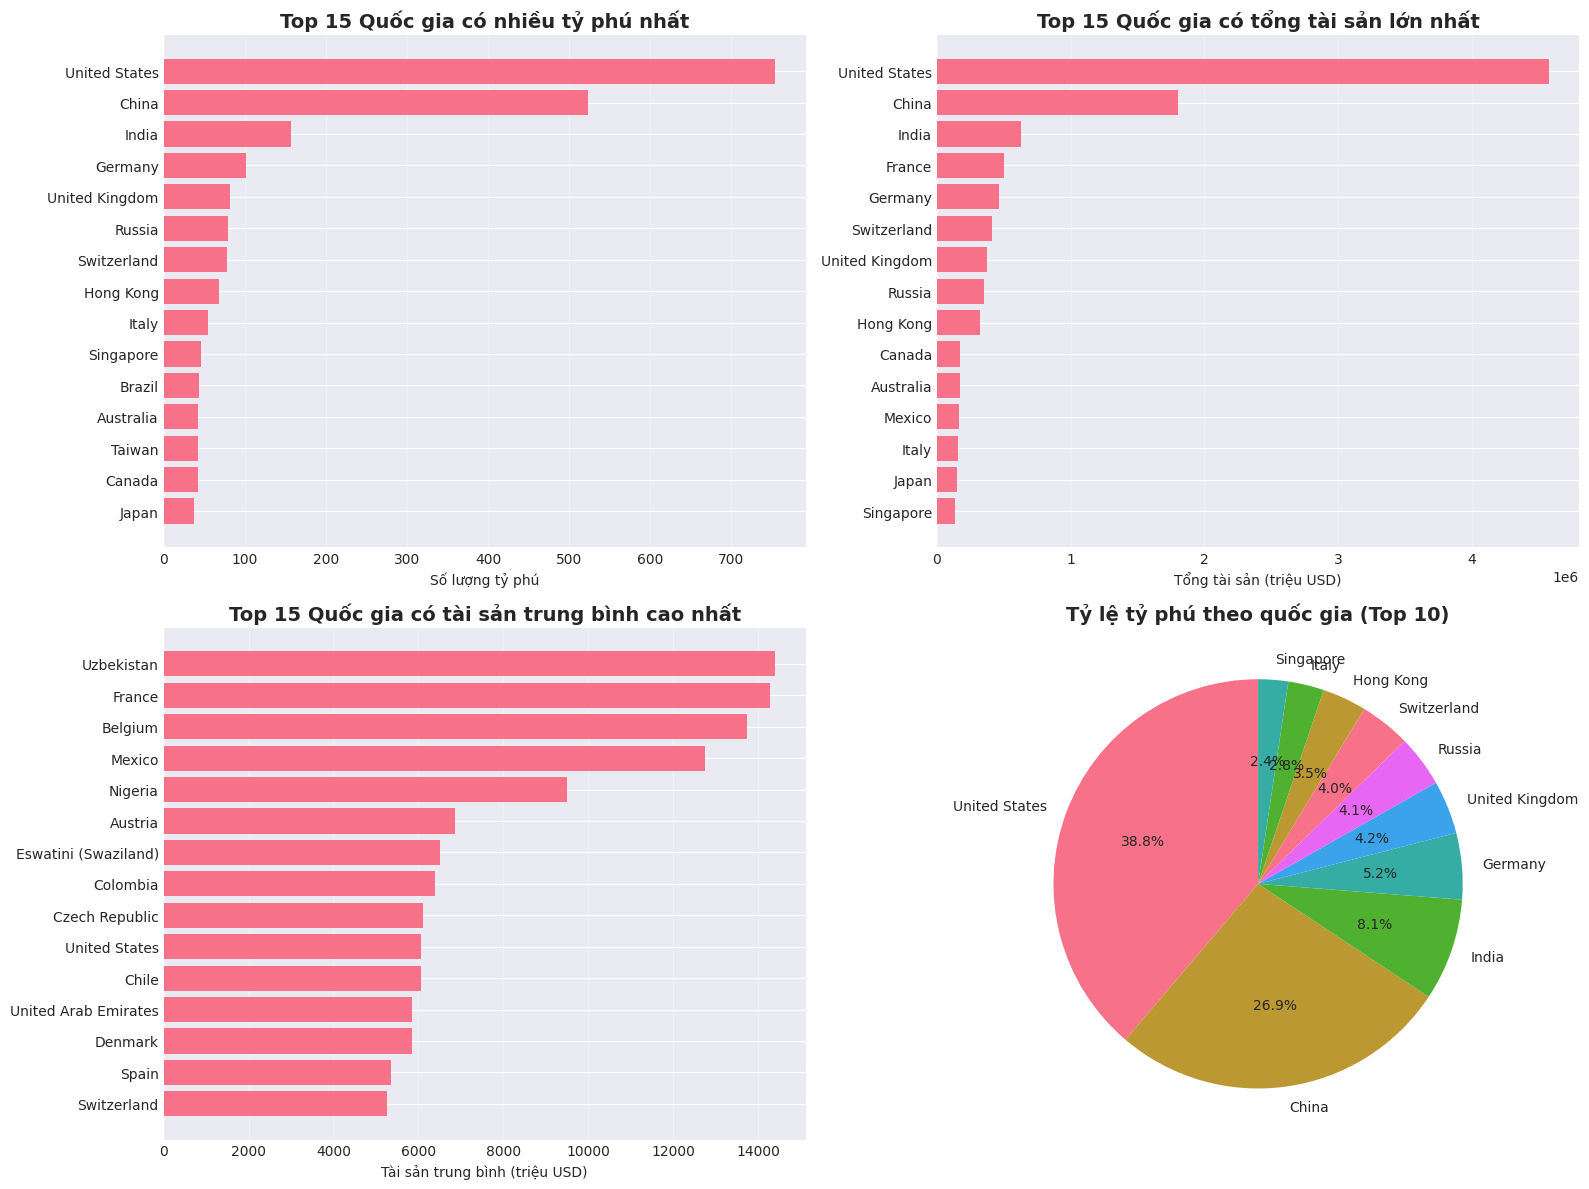

In [12]:
# Biểu đồ phân tích theo quốc gia
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 quốc gia có nhiều tỷ phú nhất
top_countries_count = df['country'].value_counts().head(15)
axes[0, 0].barh(range(len(top_countries_count)), top_countries_count.values)
axes[0, 0].set_yticks(range(len(top_countries_count)))
axes[0, 0].set_yticklabels(top_countries_count.index, fontsize=10)
axes[0, 0].set_title('Top 15 Quốc gia có nhiều tỷ phú nhất', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Số lượng tỷ phú')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Top 15 quốc gia có tổng tài sản lớn nhất
top_countries_wealth = df.groupby('country')['finalWorth'].sum().sort_values(ascending=False).head(15)
axes[0, 1].barh(range(len(top_countries_wealth)), top_countries_wealth.values)
axes[0, 1].set_yticks(range(len(top_countries_wealth)))
axes[0, 1].set_yticklabels(top_countries_wealth.index, fontsize=10)
axes[0, 1].set_title('Top 15 Quốc gia có tổng tài sản lớn nhất', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Tổng tài sản (triệu USD)')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Tài sản trung bình theo quốc gia (top 15)
top_countries_avg = df.groupby('country')['finalWorth'].mean().sort_values(ascending=False).head(15)
axes[1, 0].barh(range(len(top_countries_avg)), top_countries_avg.values)
axes[1, 0].set_yticks(range(len(top_countries_avg)))
axes[1, 0].set_yticklabels(top_countries_avg.index, fontsize=10)
axes[1, 0].set_title('Top 15 Quốc gia có tài sản trung bình cao nhất', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Tài sản trung bình (triệu USD)')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Pie chart cho top 10 quốc gia
top_10_countries = df['country'].value_counts().head(10)
axes[1, 1].pie(top_10_countries.values, labels=top_10_countries.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Tỷ lệ tỷ phú theo quốc gia (Top 10)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 3. Phân tích theo Ngành nghề (Category)


In [13]:
# Phân tích theo ngành nghề
category_stats = df.groupby('category').agg({
    'finalWorth': ['count', 'sum', 'mean'],
}).round(2)
category_stats.columns = ['Số lượng', 'Tổng tài sản (triệu USD)', 'Tài sản TB (triệu USD)']
category_stats = category_stats.sort_values('Số lượng', ascending=False)

print("="*50)
print("PHÂN TÍCH THEO NGÀNH NGHỀ")
print("="*50)
print(category_stats)


PHÂN TÍCH THEO NGÀNH NGHỀ
                            Số lượng  Tổng tài sản (triệu USD)  \
category                                                         
Finance & Investments            372                   1605100   
Manufacturing                    324                   1019000   
Technology                       314                   1877900   
Fashion & Retail                 266                   1698800   
Food & Beverage                  212                    957200   
Healthcare                       201                    643200   
Real Estate                      193                    657400   
Diversified                      187                    905200   
Energy                           100                    453500   
Media & Entertainment             91                    427500   
Metals & Mining                   74                    446800   
Automotive                        73                    525300   
Service                           53              

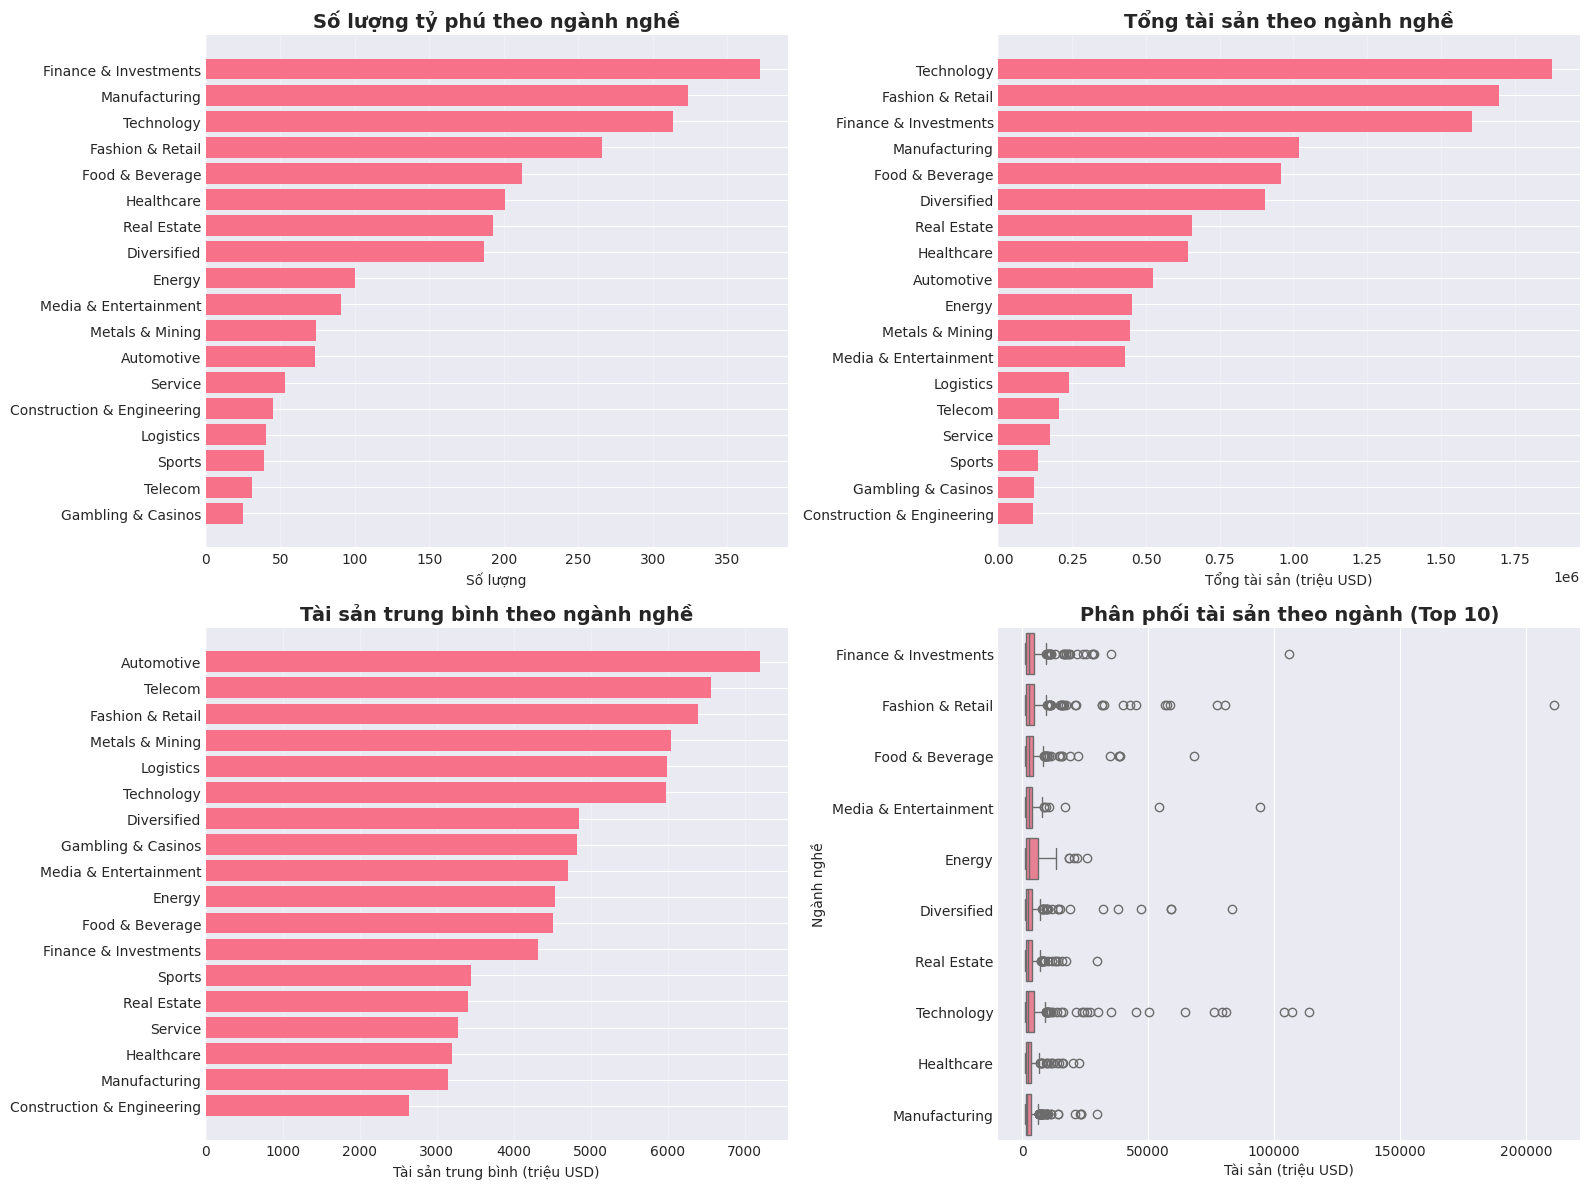

In [14]:
# Biểu đồ phân tích theo ngành nghề
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Số lượng tỷ phú theo ngành
category_count = df['category'].value_counts()
axes[0, 0].barh(range(len(category_count)), category_count.values)
axes[0, 0].set_yticks(range(len(category_count)))
axes[0, 0].set_yticklabels(category_count.index, fontsize=10)
axes[0, 0].set_title('Số lượng tỷ phú theo ngành nghề', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Số lượng')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Tổng tài sản theo ngành
category_wealth = df.groupby('category')['finalWorth'].sum().sort_values(ascending=False)
axes[0, 1].barh(range(len(category_wealth)), category_wealth.values)
axes[0, 1].set_yticks(range(len(category_wealth)))
axes[0, 1].set_yticklabels(category_wealth.index, fontsize=10)
axes[0, 1].set_title('Tổng tài sản theo ngành nghề', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Tổng tài sản (triệu USD)')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Tài sản trung bình theo ngành
category_avg = df.groupby('category')['finalWorth'].mean().sort_values(ascending=False)
axes[1, 0].barh(range(len(category_avg)), category_avg.values)
axes[1, 0].set_yticks(range(len(category_avg)))
axes[1, 0].set_yticklabels(category_avg.index, fontsize=10)
axes[1, 0].set_title('Tài sản trung bình theo ngành nghề', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Tài sản trung bình (triệu USD)')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Box plot tài sản theo ngành (top 10)
top_categories = df['category'].value_counts().head(10).index
df_top_cat = df[df['category'].isin(top_categories)]
category_order = df_top_cat.groupby('category')['finalWorth'].median().sort_values(ascending=False).index
sns.boxplot(data=df_top_cat, y='category', x='finalWorth', order=category_order, ax=axes[1, 1])
axes[1, 1].set_title('Phân phối tài sản theo ngành (Top 10)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Tài sản (triệu USD)')
axes[1, 1].set_ylabel('Ngành nghề')

plt.tight_layout()
plt.show()


## 4. Phân tích theo Giới tính và Self-Made


In [15]:
# Phân tích theo giới tính
print("="*50)
print("PHÂN TÍCH THEO GIỚI TÍNH")
print("="*50)
gender_stats = df.groupby('gender').agg({
    'finalWorth': ['count', 'sum', 'mean'],
}).round(2)
gender_stats.columns = ['Số lượng', 'Tổng tài sản (triệu USD)', 'Tài sản TB (triệu USD)']
print(gender_stats)

print("\n" + "="*50)
print("PHÂN TÍCH THEO SELF-MADE")
print("="*50)
selfmade_stats = df.groupby('selfMade').agg({
    'finalWorth': ['count', 'sum', 'mean'],
}).round(2)
selfmade_stats.columns = ['Số lượng', 'Tổng tài sản (triệu USD)', 'Tài sản TB (triệu USD)']
print(selfmade_stats)


PHÂN TÍCH THEO GIỚI TÍNH
        Số lượng  Tổng tài sản (triệu USD)  Tài sản TB (triệu USD)
gender                                                            
F            337                   1540200                 4570.33
M           2303                  10666600                 4631.61

PHÂN TÍCH THEO SELF-MADE
          Số lượng  Tổng tài sản (triệu USD)  Tài sản TB (triệu USD)
selfMade                                                            
False          828                   4115500                 4970.41
True          1812                   8091300                 4465.40


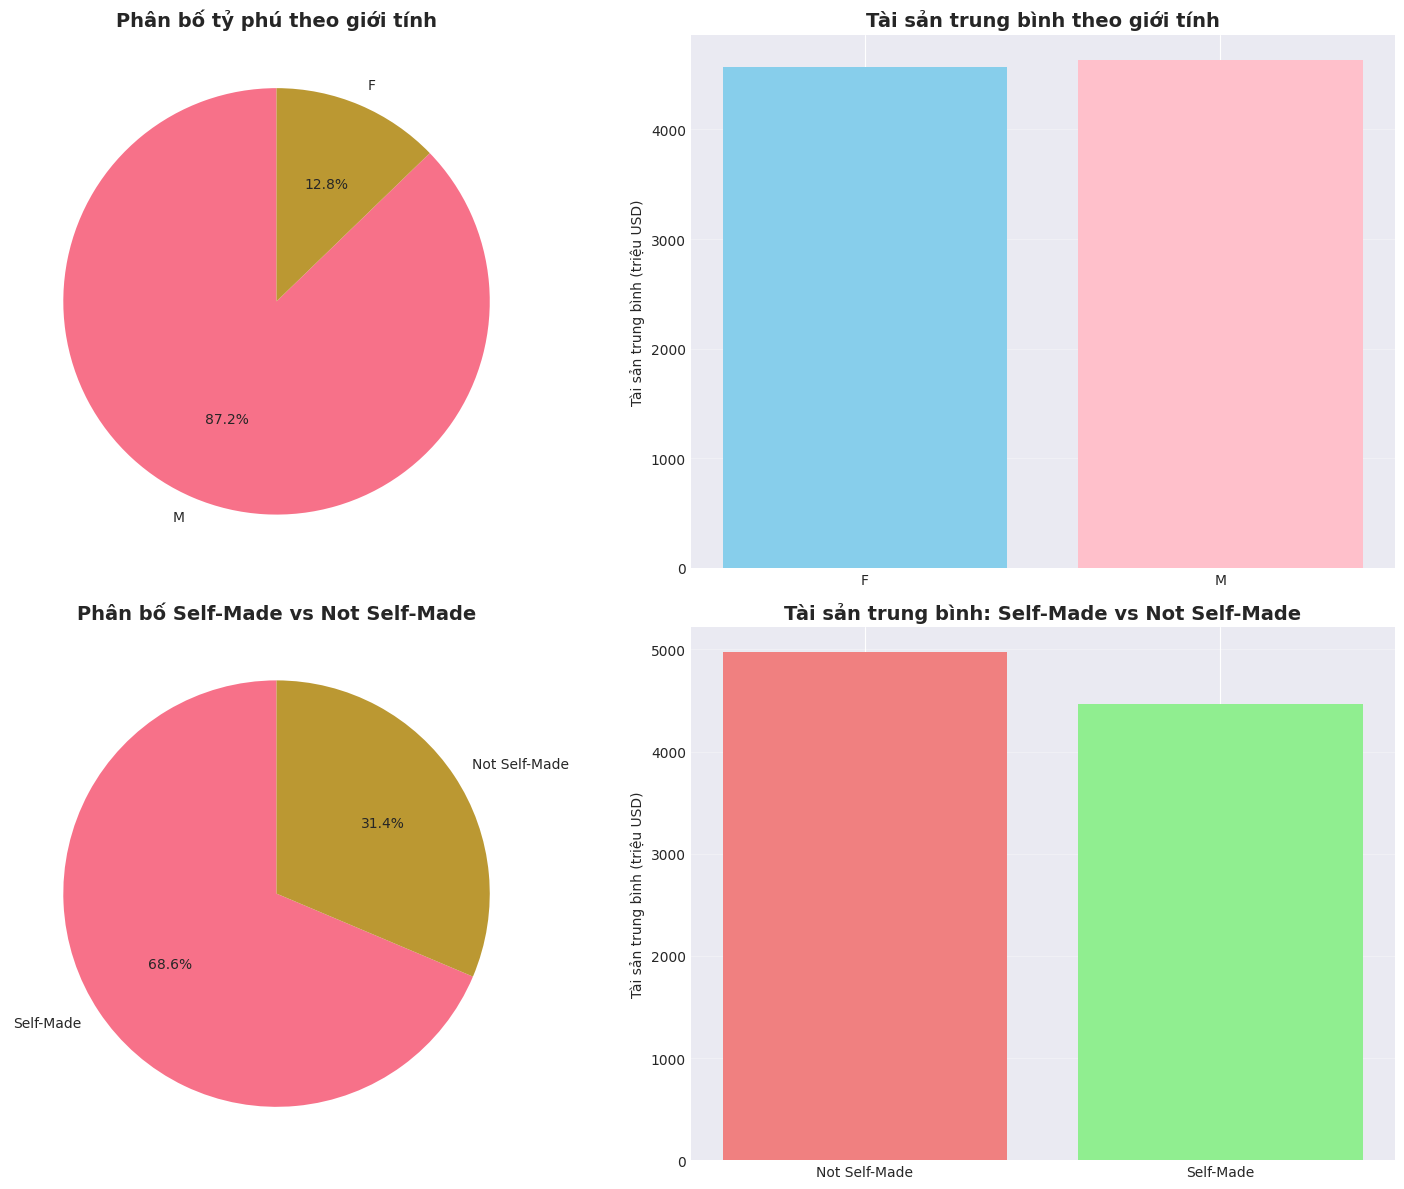

In [16]:
# Biểu đồ phân tích giới tính và self-made
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Phân bố theo giới tính
gender_count = df['gender'].value_counts()
axes[0, 0].pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Phân bố tỷ phú theo giới tính', fontsize=14, fontweight='bold')

# 2. Tài sản trung bình theo giới tính
gender_avg = df.groupby('gender')['finalWorth'].mean()
axes[0, 1].bar(gender_avg.index, gender_avg.values, color=['skyblue', 'pink'])
axes[0, 1].set_title('Tài sản trung bình theo giới tính', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Tài sản trung bình (triệu USD)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Phân bố Self-Made
selfmade_count = df['selfMade'].value_counts()
axes[1, 0].pie(selfmade_count.values, labels=['Self-Made', 'Not Self-Made'], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Phân bố Self-Made vs Not Self-Made', fontsize=14, fontweight='bold')

# 4. Tài sản trung bình theo Self-Made
selfmade_avg = df.groupby('selfMade')['finalWorth'].mean()
axes[1, 1].bar(['Not Self-Made', 'Self-Made'], selfmade_avg.values, color=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Tài sản trung bình: Self-Made vs Not Self-Made', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Tài sản trung bình (triệu USD)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 5. Phân tích theo Độ tuổi


In [17]:
# Phân tích theo độ tuổi
print("="*50)
print("PHÂN TÍCH THEO ĐỘ TUỔI")
print("="*50)
print(f"Độ tuổi trung bình: {df['age'].mean():.1f} tuổi")
print(f"Độ tuổi trung vị: {df['age'].median():.1f} tuổi")
print(f"Độ tuổi tối thiểu: {df['age'].min():.0f} tuổi")
print(f"Độ tuổi tối đa: {df['age'].max():.0f} tuổi")

# Phân nhóm tuổi
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 70, 80, 100], 
                         labels=['<40', '40-50', '50-60', '60-70', '70-80', '80+'])
age_group_stats = df.groupby('age_group').agg({
    'finalWorth': ['count', 'mean'],
}).round(2)
age_group_stats.columns = ['Số lượng', 'Tài sản TB (triệu USD)']
print("\nPhân tích theo nhóm tuổi:")
print(age_group_stats)


PHÂN TÍCH THEO ĐỘ TUỔI
Độ tuổi trung bình: 65.1 tuổi
Độ tuổi trung vị: 65.0 tuổi
Độ tuổi tối thiểu: 18 tuổi
Độ tuổi tối đa: 101 tuổi

Phân tích theo nhóm tuổi:
           Số lượng  Tài sản TB (triệu USD)
age_group                                  
<40              85                 4462.35
40-50           239                 3620.08
50-60           679                 4298.09
60-70           660                 4332.73
70-80           573                 4991.27
80+             338                 6406.21


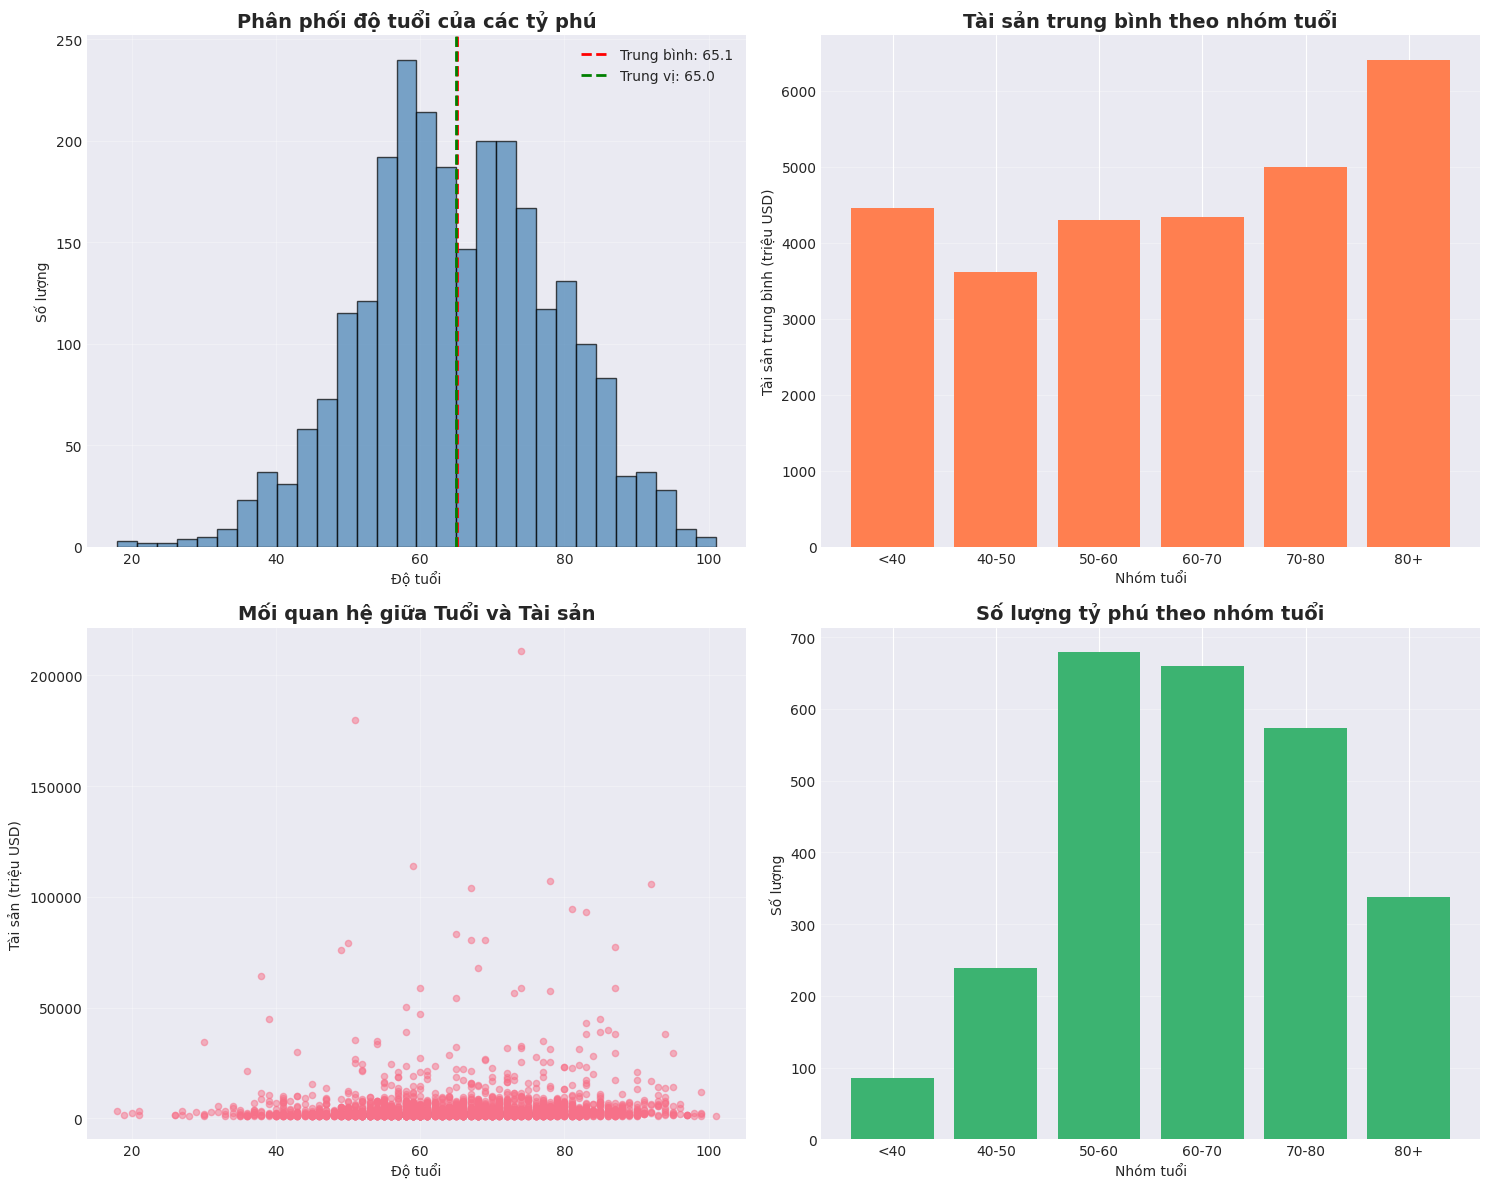

In [18]:
# Biểu đồ phân tích độ tuổi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram độ tuổi
axes[0, 0].hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Trung bình: {df["age"].mean():.1f}')
axes[0, 0].axvline(df['age'].median(), color='green', linestyle='--', linewidth=2, label=f'Trung vị: {df["age"].median():.1f}')
axes[0, 0].set_title('Phân phối độ tuổi của các tỷ phú', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Độ tuổi')
axes[0, 0].set_ylabel('Số lượng')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Tài sản trung bình theo nhóm tuổi
age_group_avg = df.groupby('age_group')['finalWorth'].mean()
axes[0, 1].bar(range(len(age_group_avg)), age_group_avg.values, color='coral')
axes[0, 1].set_xticks(range(len(age_group_avg)))
axes[0, 1].set_xticklabels(age_group_avg.index)
axes[0, 1].set_title('Tài sản trung bình theo nhóm tuổi', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Nhóm tuổi')
axes[0, 1].set_ylabel('Tài sản trung bình (triệu USD)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Scatter plot: Tuổi vs Tài sản
axes[1, 0].scatter(df['age'], df['finalWorth'], alpha=0.5, s=20)
axes[1, 0].set_title('Mối quan hệ giữa Tuổi và Tài sản', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Độ tuổi')
axes[1, 0].set_ylabel('Tài sản (triệu USD)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Số lượng tỷ phú theo nhóm tuổi
age_group_count = df['age_group'].value_counts().sort_index()
axes[1, 1].bar(range(len(age_group_count)), age_group_count.values, color='mediumseagreen')
axes[1, 1].set_xticks(range(len(age_group_count)))
axes[1, 1].set_xticklabels(age_group_count.index)
axes[1, 1].set_title('Số lượng tỷ phú theo nhóm tuổi', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Nhóm tuổi')
axes[1, 1].set_ylabel('Số lượng')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 6. Phân tích mối quan hệ với các chỉ số kinh tế - xã hội


In [19]:
# Làm sạch dữ liệu GDP (loại bỏ ký tự $ và dấu phẩy)
df['gdp_country_clean'] = df['gdp_country'].str.replace('$', '').str.replace(',', '').str.strip()
df['gdp_country_clean'] = pd.to_numeric(df['gdp_country_clean'], errors='coerce')

# Tính toán tài sản trung bình theo quốc gia
country_analysis = df.groupby('country').agg({
    'finalWorth': 'mean',
    'gdp_country_clean': 'first',
    'population_country': 'first',
    'life_expectancy_country': 'first',
    'cpi_country': 'first',
    'tax_revenue_country_country': 'first'
}).reset_index()

country_analysis = country_analysis.dropna(subset=['gdp_country_clean', 'finalWorth'])

print("="*50)
print("MỐI QUAN HỆ GIỮA TÀI SẢN VÀ CÁC CHỈ SỐ KINH TẾ")
print("="*50)
print(f"Số quốc gia có đủ dữ liệu: {len(country_analysis)}")
print("\nTương quan giữa các biến:")
correlation_cols = ['finalWorth', 'gdp_country_clean', 'population_country', 
                    'life_expectancy_country', 'cpi_country', 'tax_revenue_country_country']
corr_matrix = country_analysis[correlation_cols].corr()
print(corr_matrix)


MỐI QUAN HỆ GIỮA TÀI SẢN VÀ CÁC CHỈ SỐ KINH TẾ
Số quốc gia có đủ dữ liệu: 68

Tương quan giữa các biến:
                             finalWorth  gdp_country_clean  \
finalWorth                     1.000000           0.092507   
gdp_country_clean              0.092507           1.000000   
population_country             0.033596           0.613686   
life_expectancy_country       -0.053714           0.079660   
cpi_country                   -0.055658          -0.103106   
tax_revenue_country_country   -0.004087          -0.223085   

                             population_country  life_expectancy_country  \
finalWorth                             0.033596                -0.053714   
gdp_country_clean                      0.613686                 0.079660   
population_country                     1.000000                -0.223161   
life_expectancy_country               -0.223161                 1.000000   
cpi_country                            0.137498                -0.648989   
tax_r

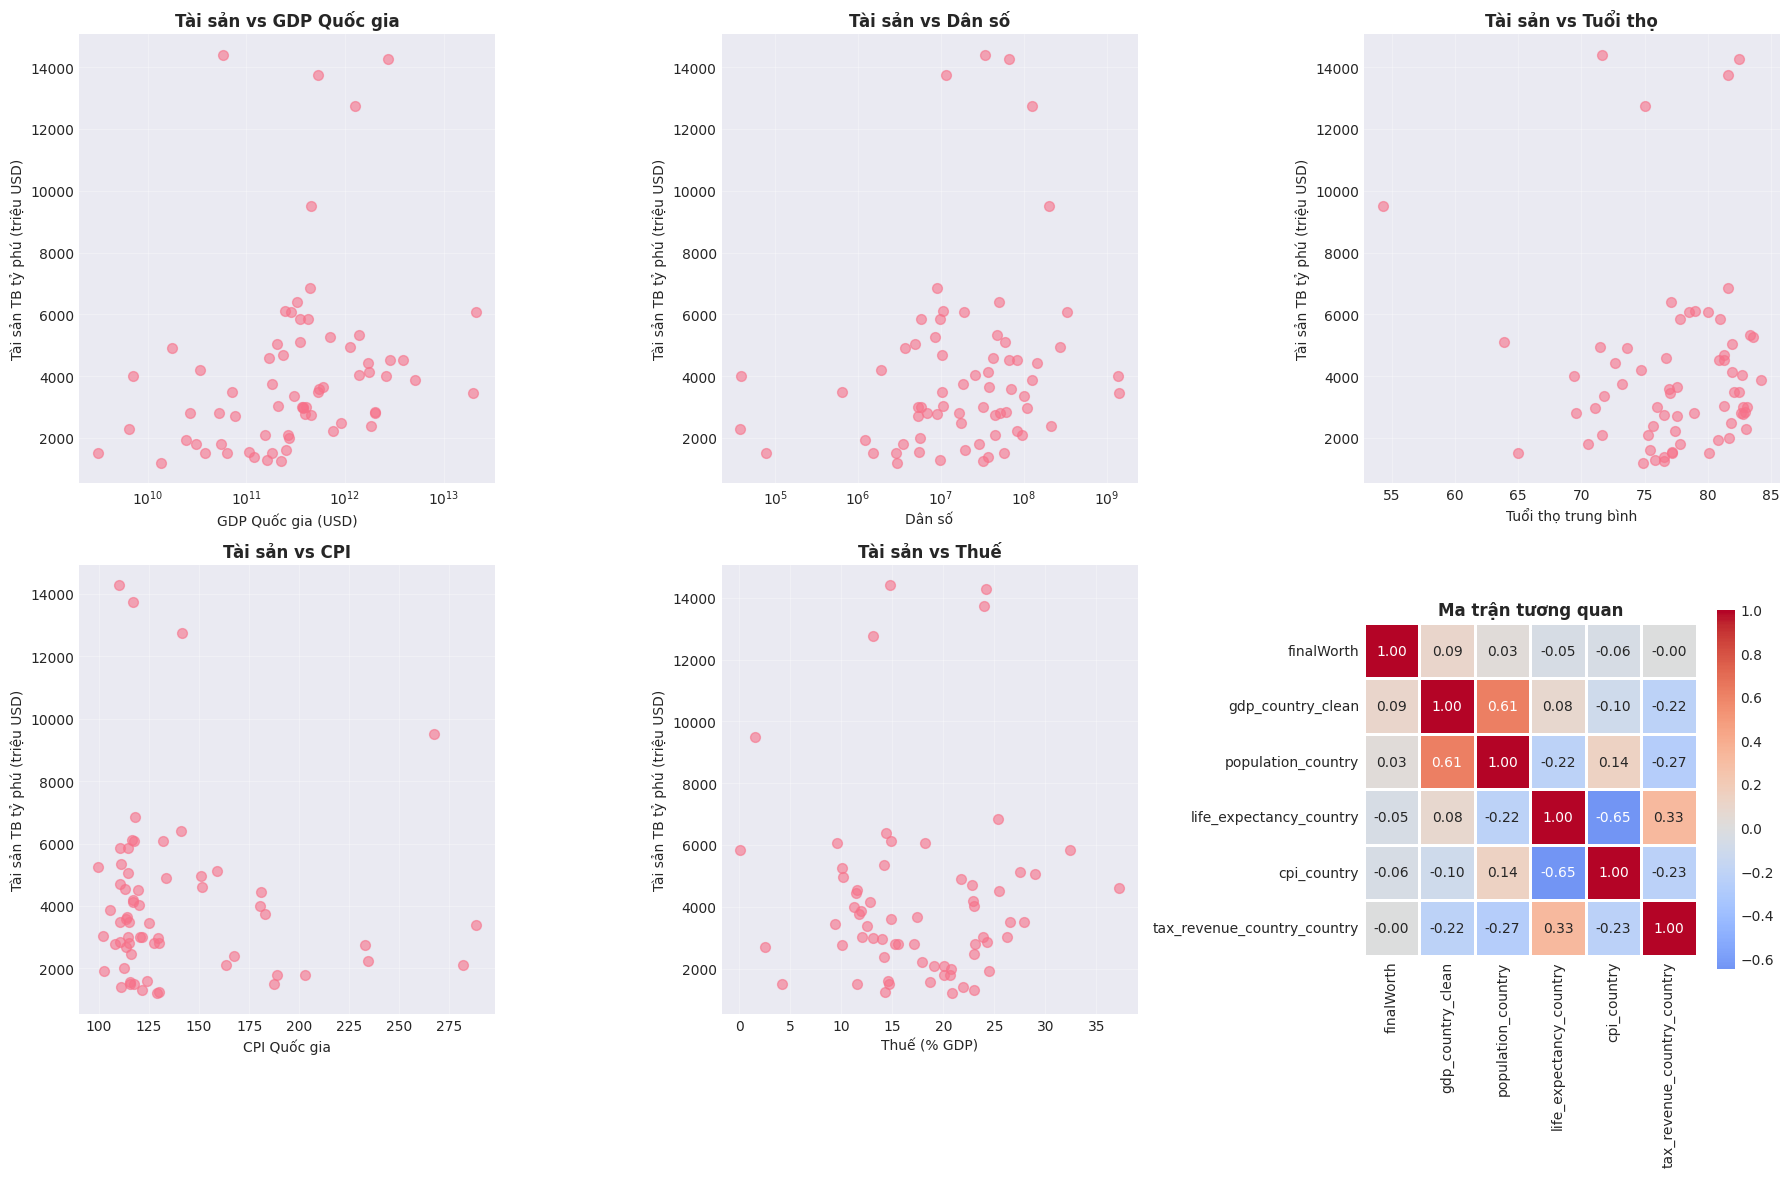

In [20]:
# Biểu đồ phân tích mối quan hệ
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Tài sản vs GDP
axes[0, 0].scatter(country_analysis['gdp_country_clean'], country_analysis['finalWorth'], alpha=0.6, s=50)
axes[0, 0].set_xlabel('GDP Quốc gia (USD)')
axes[0, 0].set_ylabel('Tài sản TB tỷ phú (triệu USD)')
axes[0, 0].set_title('Tài sản vs GDP Quốc gia', fontsize=12, fontweight='bold')
axes[0, 0].set_xscale('log')
axes[0, 0].grid(True, alpha=0.3)

# 2. Tài sản vs Dân số
axes[0, 1].scatter(country_analysis['population_country'], country_analysis['finalWorth'], alpha=0.6, s=50)
axes[0, 1].set_xlabel('Dân số')
axes[0, 1].set_ylabel('Tài sản TB tỷ phú (triệu USD)')
axes[0, 1].set_title('Tài sản vs Dân số', fontsize=12, fontweight='bold')
axes[0, 1].set_xscale('log')
axes[0, 1].grid(True, alpha=0.3)

# 3. Tài sản vs Tuổi thọ
axes[0, 2].scatter(country_analysis['life_expectancy_country'], country_analysis['finalWorth'], alpha=0.6, s=50)
axes[0, 2].set_xlabel('Tuổi thọ trung bình')
axes[0, 2].set_ylabel('Tài sản TB tỷ phú (triệu USD)')
axes[0, 2].set_title('Tài sản vs Tuổi thọ', fontsize=12, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. Tài sản vs CPI
axes[1, 0].scatter(country_analysis['cpi_country'], country_analysis['finalWorth'], alpha=0.6, s=50)
axes[1, 0].set_xlabel('CPI Quốc gia')
axes[1, 0].set_ylabel('Tài sản TB tỷ phú (triệu USD)')
axes[1, 0].set_title('Tài sản vs CPI', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 5. Tài sản vs Thuế
axes[1, 1].scatter(country_analysis['tax_revenue_country_country'], country_analysis['finalWorth'], alpha=0.6, s=50)
axes[1, 1].set_xlabel('Thuế (% GDP)')
axes[1, 1].set_ylabel('Tài sản TB tỷ phú (triệu USD)')
axes[1, 1].set_title('Tài sản vs Thuế', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 6. Heatmap tương quan
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1, 2])
axes[1, 2].set_title('Ma trận tương quan', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Phân tích nâng cao - Tổng hợp và Insights


In [21]:
# Phân tích tổng hợp
print("="*60)
print("TỔNG HỢP PHÂN TÍCH VÀ INSIGHTS")
print("="*60)

print("\n1. TOP 5 QUỐC GIA:")
print("-" * 60)
top5_countries = df.groupby('country').agg({
    'personName': 'count',
    'finalWorth': ['sum', 'mean']
}).round(2)
top5_countries.columns = ['Số lượng', 'Tổng tài sản', 'Tài sản TB']
top5_countries = top5_countries.sort_values('Số lượng', ascending=False).head(5)
print(top5_countries)

print("\n2. TOP 5 NGÀNH NGHỀ:")
print("-" * 60)
top5_categories = df.groupby('category').agg({
    'personName': 'count',
    'finalWorth': ['sum', 'mean']
}).round(2)
top5_categories.columns = ['Số lượng', 'Tổng tài sản', 'Tài sản TB']
top5_categories = top5_categories.sort_values('Số lượng', ascending=False).head(5)
print(top5_categories)

print("\n3. THỐNG KÊ GIỚI TÍNH:")
print("-" * 60)
gender_summary = df['gender'].value_counts()
for gender, count in gender_summary.items():
    pct = (count / len(df)) * 100
    print(f"{gender}: {count} ({pct:.1f}%)")

print("\n4. THỐNG KÊ SELF-MADE:")
print("-" * 60)
selfmade_summary = df['selfMade'].value_counts()
for status, count in selfmade_summary.items():
    pct = (count / len(df)) * 100
    status_name = "Self-Made" if status else "Not Self-Made"
    print(f"{status_name}: {count} ({pct:.1f}%)")

print("\n5. PHÂN TÍCH ĐỘ TUỔI:")
print("-" * 60)
print(f"Độ tuổi trung bình: {df['age'].mean():.1f} tuổi")
print(f"Nhóm tuổi phổ biến nhất: {df['age_group'].mode()[0]}")
print(f"Số tỷ phú dưới 40 tuổi: {len(df[df['age'] < 40])}")
print(f"Số tỷ phú trên 80 tuổi: {len(df[df['age'] > 80])}")


TỔNG HỢP PHÂN TÍCH VÀ INSIGHTS

1. TOP 5 QUỐC GIA:
------------------------------------------------------------
                Số lượng  Tổng tài sản  Tài sản TB
country                                           
United States        754       4575100     6067.77
China                523       1805500     3452.20
India                157        628700     4004.46
Germany              102        462100     4530.39
United Kingdom        82        370700     4520.73

2. TOP 5 NGÀNH NGHỀ:
------------------------------------------------------------
                       Số lượng  Tổng tài sản  Tài sản TB
category                                                 
Finance & Investments       372       1605100     4314.78
Manufacturing               324       1019000     3145.06
Technology                  314       1877900     5980.57
Fashion & Retail            266       1698800     6386.47
Food & Beverage             212        957200     4515.09

3. THỐNG KÊ GIỚI TÍNH:
------------------

In [22]:
# Tạo bảng tổng hợp đa chiều
print("\n6. BẢNG TỔNG HỢP ĐA CHIỀU:")
print("-" * 60)
pivot_table = pd.pivot_table(df, 
                             values='finalWorth', 
                             index='country', 
                             columns='category', 
                             aggfunc='mean',
                             fill_value=0)
print("Tài sản trung bình theo Quốc gia và Ngành nghề (Top 10 quốc gia):")
top_countries_list = df['country'].value_counts().head(10).index
print(pivot_table.loc[top_countries_list].round(0))



6. BẢNG TỔNG HỢP ĐA CHIỀU:
------------------------------------------------------------
Tài sản trung bình theo Quốc gia và Ngành nghề (Top 10 quốc gia):
category        Automotive  Construction & Engineering  Diversified  Energy  \
country                                                                       
United States      18825.0                      4180.0      11062.0  4580.0   
China               7109.0                      1750.0       2771.0  3544.0   
India               2269.0                      2033.0       9177.0     0.0   
Germany             8950.0                         0.0       2800.0     0.0   
United Kingdom         0.0                      2933.0       6767.0  5380.0   
Russia                 0.0                      2150.0       3038.0  6213.0   
Switzerland         3450.0                      4300.0       1500.0  4000.0   
Hong Kong              0.0                         0.0      24900.0  3075.0   
Italy               4200.0                      1875.0 

## 8. Phân tích theo Thành phố và Khu vực


In [ ]:
# Phân tích theo thành phố
print("="*50)
print("TOP 20 THÀNH PHỐ CÓ NHIỀU TỶ PHÚ NHẤT")
print("="*50)
city_stats = df.groupby('city').agg({
    'finalWorth': ['count', 'sum', 'mean'],
}).round(2)
city_stats.columns = ['Số lượng', 'Tổng tài sản (triệu USD)', 'Tài sản TB (triệu USD)']
city_stats = city_stats.sort_values('Số lượng', ascending=False)
print(city_stats.head(20))

# Phân tích theo khu vực (nếu có dữ liệu)
if 'residenceStateRegion' in df.columns:
    print("\n" + "="*50)
    print("PHÂN TÍCH THEO KHU VỰC (Hoa Kỳ)")
    print("="*50)
    region_stats = df[df['residenceStateRegion'].notna()].groupby('residenceStateRegion').agg({
        'finalWorth': ['count', 'sum', 'mean'],
    }).round(2)
    region_stats.columns = ['Số lượng', 'Tổng tài sản (triệu USD)', 'Tài sản TB (triệu USD)']
    region_stats = region_stats.sort_values('Số lượng', ascending=False)
    print(region_stats)


In [ ]:
# Biểu đồ phân tích thành phố
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 thành phố có nhiều tỷ phú nhất
top_cities_count = df['city'].value_counts().head(15)
axes[0, 0].barh(range(len(top_cities_count)), top_cities_count.values)
axes[0, 0].set_yticks(range(len(top_cities_count)))
axes[0, 0].set_yticklabels(top_cities_count.index, fontsize=9)
axes[0, 0].set_title('Top 15 Thành phố có nhiều tỷ phú nhất', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Số lượng tỷ phú')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Top 15 thành phố có tổng tài sản lớn nhất
top_cities_wealth = df.groupby('city')['finalWorth'].sum().sort_values(ascending=False).head(15)
axes[0, 1].barh(range(len(top_cities_wealth)), top_cities_wealth.values)
axes[0, 1].set_yticks(range(len(top_cities_wealth)))
axes[0, 1].set_yticklabels(top_cities_wealth.index, fontsize=9)
axes[0, 1].set_title('Top 15 Thành phố có tổng tài sản lớn nhất', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Tổng tài sản (triệu USD)')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Tài sản trung bình theo thành phố (top 15)
top_cities_avg = df.groupby('city')['finalWorth'].mean().sort_values(ascending=False).head(15)
axes[1, 0].barh(range(len(top_cities_avg)), top_cities_avg.values)
axes[1, 0].set_yticks(range(len(top_cities_avg)))
axes[1, 0].set_yticklabels(top_cities_avg.index, fontsize=9)
axes[1, 0].set_title('Top 15 Thành phố có tài sản trung bình cao nhất', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Tài sản trung bình (triệu USD)')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Phân tích theo khu vực (nếu có)
if 'residenceStateRegion' in df.columns and df['residenceStateRegion'].notna().sum() > 0:
    region_count = df[df['residenceStateRegion'].notna()]['residenceStateRegion'].value_counts()
    axes[1, 1].pie(region_count.values, labels=region_count.index, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Phân bố tỷ phú theo khu vực (Hoa Kỳ)', fontsize=14, fontweight='bold')
else:
    axes[1, 1].text(0.5, 0.5, 'Không có dữ liệu khu vực', 
                    ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Phân bố theo khu vực', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# Phân tích theo Status
print("="*50)
print("PHÂN TÍCH THEO STATUS")
print("="*50)
status_stats = df.groupby('status').agg({
    'finalWorth': ['count', 'sum', 'mean'],
}).round(2)
status_stats.columns = ['Số lượng', 'Tổng tài sản (triệu USD)', 'Tài sản TB (triệu USD)']
status_stats = status_stats.sort_values('Số lượng', ascending=False)
print(status_stats)

# Giải thích Status
status_explanation = {
    'U': 'Unknown/Unspecified',
    'D': 'Deceased',
    'E': 'Estate',
    'Split Family Fortune': 'Split Family Fortune'
}
print("\nGiải thích Status:")
for code, meaning in status_explanation.items():
    if code in status_stats.index:
        print(f"  {code}: {meaning}")

# Phân tích theo tổ chức (top 20)
print("\n" + "="*50)
print("TOP 20 TỔ CHỨC CÓ NHIỀU TỶ PHÚ NHẤT")
print("="*50)
org_stats = df[df['organization'].notna()].groupby('organization').agg({
    'finalWorth': ['count', 'sum', 'mean'],
}).round(2)
org_stats.columns = ['Số lượng', 'Tổng tài sản (triệu USD)', 'Tài sản TB (triệu USD)']
org_stats = org_stats.sort_values('Số lượng', ascending=False)
print(org_stats.head(20))


In [ ]:
# Biểu đồ phân tích Status và Tổ chức
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Phân bố theo Status
status_count = df['status'].value_counts()
axes[0, 0].pie(status_count.values, labels=status_count.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Phân bố tỷ phú theo Status', fontsize=14, fontweight='bold')

# 2. Tài sản trung bình theo Status
status_avg = df.groupby('status')['finalWorth'].mean().sort_values(ascending=False)
axes[0, 1].bar(range(len(status_avg)), status_avg.values, color='steelblue')
axes[0, 1].set_xticks(range(len(status_avg)))
axes[0, 1].set_xticklabels(status_avg.index)
axes[0, 1].set_title('Tài sản trung bình theo Status', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Tài sản trung bình (triệu USD)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Top 15 tổ chức có nhiều tỷ phú nhất
if df['organization'].notna().sum() > 0:
    top_orgs = df[df['organization'].notna()]['organization'].value_counts().head(15)
    axes[1, 0].barh(range(len(top_orgs)), top_orgs.values)
    axes[1, 0].set_yticks(range(len(top_orgs)))
    axes[1, 0].set_yticklabels(top_orgs.index, fontsize=9)
    axes[1, 0].set_title('Top 15 Tổ chức có nhiều tỷ phú nhất', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Số lượng tỷ phú')
    axes[1, 0].invert_yaxis()
    axes[1, 0].grid(True, alpha=0.3, axis='x')
else:
    axes[1, 0].text(0.5, 0.5, 'Không có dữ liệu tổ chức', 
                    ha='center', va='center', fontsize=12)
    axes[1, 0].set_title('Top 15 Tổ chức', fontsize=14, fontweight='bold')

# 4. Tài sản trung bình theo tổ chức (top 15)
if df['organization'].notna().sum() > 0:
    top_orgs_avg = df[df['organization'].notna()].groupby('organization')['finalWorth'].mean().sort_values(ascending=False).head(15)
    axes[1, 1].barh(range(len(top_orgs_avg)), top_orgs_avg.values)
    axes[1, 1].set_yticks(range(len(top_orgs_avg)))
    axes[1, 1].set_yticklabels(top_orgs_avg.index, fontsize=9)
    axes[1, 1].set_title('Top 15 Tổ chức có tài sản TB cao nhất', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Tài sản trung bình (triệu USD)')
    axes[1, 1].invert_yaxis()
    axes[1, 1].grid(True, alpha=0.3, axis='x')
else:
    axes[1, 1].text(0.5, 0.5, 'Không có dữ liệu tổ chức', 
                    ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Tài sản TB theo tổ chức', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 10. Phân tích Outliers và Dữ liệu bất thường


In [ ]:
# Phát hiện outliers sử dụng IQR method
Q1 = df['finalWorth'].quantile(0.25)
Q3 = df['finalWorth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['finalWorth'] < lower_bound) | (df['finalWorth'] > upper_bound)]

print("="*50)
print("PHÂN TÍCH OUTLIERS")
print("="*50)
print(f"Q1 (25th percentile): ${Q1:,.0f} triệu USD")
print(f"Q3 (75th percentile): ${Q3:,.0f} triệu USD")
print(f"IQR: ${IQR:,.0f} triệu USD")
print(f"Lower bound: ${lower_bound:,.0f} triệu USD")
print(f"Upper bound: ${upper_bound:,.0f} triệu USD")
print(f"\nSố lượng outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

print("\nTop 20 Outliers (giàu nhất):")
top_outliers = outliers.nlargest(20, 'finalWorth')[['personName', 'finalWorth', 'country', 'category', 'age']]
print(top_outliers.to_string(index=False))

# Phân tích độ tuổi bất thường
print("\n" + "="*50)
print("PHÂN TÍCH ĐỘ TUỔI BẤT THƯỜNG")
print("="*50)
young_billionaires = df[df['age'] < 30]
old_billionaires = df[df['age'] > 90]
print(f"Số tỷ phú dưới 30 tuổi: {len(young_billionaires)}")
if len(young_billionaires) > 0:
    print("\nTỷ phú trẻ nhất:")
    print(young_billionaires.nsmallest(5, 'age')[['personName', 'age', 'finalWorth', 'country']].to_string(index=False))
print(f"\nSố tỷ phú trên 90 tuổi: {len(old_billionaires)}")
if len(old_billionaires) > 0:
    print("\nTỷ phú già nhất:")
    print(old_billionaires.nlargest(5, 'age')[['personName', 'age', 'finalWorth', 'country']].to_string(index=False))


In [ ]:
# Biểu đồ phân tích outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Box plot với outliers
axes[0, 0].boxplot(df['finalWorth'], vert=True)
axes[0, 0].set_title('Box Plot - Phát hiện Outliers', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Tài sản (triệu USD)')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Histogram với outliers được đánh dấu
axes[0, 1].hist(df['finalWorth'], bins=100, edgecolor='black', alpha=0.7, color='steelblue', label='Normal')
axes[0, 1].hist(outliers['finalWorth'], bins=50, edgecolor='red', alpha=0.7, color='red', label='Outliers')
axes[0, 1].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper bound: ${upper_bound:,.0f}')
axes[0, 1].set_title('Phân phối tài sản với Outliers', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Tài sản (triệu USD)')
axes[0, 1].set_ylabel('Số lượng')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter plot: Tuổi vs Tài sản với outliers
axes[1, 0].scatter(df['age'], df['finalWorth'], alpha=0.3, s=20, label='Normal', color='blue')
axes[1, 0].scatter(outliers['age'], outliers['finalWorth'], alpha=0.7, s=50, label='Outliers', color='red')
axes[1, 0].set_title('Tuổi vs Tài sản - Outliers', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Độ tuổi')
axes[1, 0].set_ylabel('Tài sản (triệu USD)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Phân bố outliers theo quốc gia
if len(outliers) > 0:
    outlier_countries = outliers['country'].value_counts().head(10)
    axes[1, 1].barh(range(len(outlier_countries)), outlier_countries.values)
    axes[1, 1].set_yticks(range(len(outlier_countries)))
    axes[1, 1].set_yticklabels(outlier_countries.index, fontsize=10)
    axes[1, 1].set_title('Top 10 Quốc gia có nhiều Outliers nhất', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Số lượng outliers')
    axes[1, 1].invert_yaxis()
    axes[1, 1].grid(True, alpha=0.3, axis='x')
else:
    axes[1, 1].text(0.5, 0.5, 'Không có outliers', 
                    ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Outliers theo quốc gia', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 11. Phân tích tương quan nâng cao và Insights sâu hơn


In [ ]:
# Phân tích tương quan giữa các biến số
print("="*60)
print("PHÂN TÍCH TƯƠNG QUAN NÂNG CAO")
print("="*60)

# Tạo dataset với các biến số
numeric_cols = ['finalWorth', 'age', 'gdp_country_clean', 'population_country', 
                'life_expectancy_country', 'cpi_country', 'tax_revenue_country_country',
                'gross_tertiary_education_enrollment', 'total_tax_rate_country']
numeric_df = df[numeric_cols].copy()

# Loại bỏ các giá trị NaN
numeric_df_clean = numeric_df.dropna()

print(f"\nSố lượng mẫu sau khi làm sạch: {len(numeric_df_clean)}")
print("\nMa trận tương quan đầy đủ:")
corr_full = numeric_df_clean.corr()
print(corr_full.round(3))

# Tương quan mạnh nhất với finalWorth
print("\n" + "="*60)
print("TƯƠNG QUAN VỚI TÀI SẢN (finalWorth)")
print("="*60)
corr_with_wealth = corr_full['finalWorth'].sort_values(ascending=False)
for var, corr_val in corr_with_wealth.items():
    if var != 'finalWorth':
        print(f"{var:40s}: {corr_val:6.3f}")


In [ ]:
# Biểu đồ ma trận tương quan
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap tương quan đầy đủ
sns.heatmap(corr_full, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Ma trận tương quan đầy đủ', fontsize=14, fontweight='bold')

# Bar chart tương quan với tài sản
corr_with_wealth_sorted = corr_with_wealth.drop('finalWorth').sort_values()
axes[1].barh(range(len(corr_with_wealth_sorted)), corr_with_wealth_sorted.values, 
             color=['red' if x < 0 else 'green' for x in corr_with_wealth_sorted.values])
axes[1].set_yticks(range(len(corr_with_wealth_sorted)))
axes[1].set_yticklabels(corr_with_wealth_sorted.index, fontsize=10)
axes[1].set_title('Tương quan với Tài sản (finalWorth)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hệ số tương quan')
axes[1].axvline(0, color='black', linestyle='-', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 12. Kết luận và Đề xuất


In [ ]:
# Tổng hợp kết luận
print("="*70)
print("KẾT LUẬN VÀ INSIGHTS CHÍNH")
print("="*70)

print("\n1. PHÂN BỐ TÀI SẢN:")
print("-" * 70)
print(f"   • Tổng tài sản của tất cả tỷ phú: ${df['finalWorth'].sum():,.0f} triệu USD")
print(f"   • Tài sản trung bình: ${df['finalWorth'].mean():,.0f} triệu USD")
print(f"   • Tài sản trung vị: ${df['finalWorth'].median():,.0f} triệu USD")
print(f"   • Phân phối tài sản rất lệch (skewed) - một số ít người sở hữu phần lớn tài sản")

print("\n2. PHÂN BỐ ĐỊA LÝ:")
print("-" * 70)
top_3_countries = df['country'].value_counts().head(3)
for i, (country, count) in enumerate(top_3_countries.items(), 1):
    pct = (count / len(df)) * 100
    total_wealth = df[df['country'] == country]['finalWorth'].sum()
    print(f"   {i}. {country}: {count} tỷ phú ({pct:.1f}%), Tổng tài sản: ${total_wealth:,.0f} triệu USD")

print("\n3. PHÂN BỐ NGÀNH NGHỀ:")
print("-" * 70)
top_3_categories = df['category'].value_counts().head(3)
for i, (category, count) in enumerate(top_3_categories.items(), 1):
    pct = (count / len(df)) * 100
    avg_wealth = df[df['category'] == category]['finalWorth'].mean()
    print(f"   {i}. {category}: {count} tỷ phú ({pct:.1f}%), Tài sản TB: ${avg_wealth:,.0f} triệu USD")

print("\n4. ĐẶC ĐIỂM NHÂN KHẨU HỌC:")
print("-" * 70)
print(f"   • Độ tuổi trung bình: {df['age'].mean():.1f} tuổi")
print(f"   • Tỷ lệ nam/nữ: {len(df[df['gender']=='M'])}/{len(df[df['gender']=='F'])} ({len(df[df['gender']=='M'])/len(df)*100:.1f}% nam)")
print(f"   • Tỷ lệ Self-Made: {len(df[df['selfMade']==True])/len(df)*100:.1f}%")

print("\n5. MỐI QUAN HỆ VỚI CÁC CHỈ SỐ KINH TẾ:")
print("-" * 70)
if len(numeric_df_clean) > 0:
    corr_gdp = corr_full.loc['finalWorth', 'gdp_country_clean']
    corr_pop = corr_full.loc['finalWorth', 'population_country']
    corr_life = corr_full.loc['finalWorth', 'life_expectancy_country']
    print(f"   • Tương quan với GDP: {corr_gdp:.3f}")
    print(f"   • Tương quan với Dân số: {corr_pop:.3f}")
    print(f"   • Tương quan với Tuổi thọ: {corr_life:.3f}")

print("\n6. INSIGHTS QUAN TRỌNG:")
print("-" * 70)
print("   • Hoa Kỳ chiếm ưu thế về số lượng và tổng tài sản tỷ phú")
print("   • Công nghệ và Tài chính là hai ngành tạo ra nhiều tỷ phú nhất")
print("   • Độ tuổi trung bình khá cao (65 tuổi), cho thấy tích lũy tài sản cần thời gian")
print("   • Tỷ lệ Self-Made cao (68.6%) cho thấy nhiều tỷ phú tự tạo dựng tài sản")
print("   • Phân phối tài sản rất không đồng đều (có nhiều outliers)")

print("\n7. ĐỀ XUẤT NGHIÊN CỨU TIẾP:")
print("-" * 70)
print("   • Phân tích sâu hơn về mối quan hệ giữa giáo dục và tài sản")
print("   • Nghiên cứu xu hướng theo thời gian (nếu có dữ liệu lịch sử)")
print("   • Phân tích tác động của chính sách thuế lên tài sản tỷ phú")
print("   • So sánh giữa các khu vực địa lý khác nhau")
print("   • Phân tích các yếu tố dự đoán tài sản bằng Machine Learning")

print("\n" + "="*70)


## 13. Lưu kết quả phân tích


In [ ]:
# Lưu các bảng thống kê quan trọng ra file CSV
print("Đang lưu kết quả phân tích...")

# 1. Thống kê theo quốc gia
country_stats.to_csv('country_statistics.csv', encoding='utf-8-sig')
print("✓ Đã lưu: country_statistics.csv")

# 2. Thống kê theo ngành nghề
category_stats.to_csv('category_statistics.csv', encoding='utf-8-sig')
print("✓ Đã lưu: category_statistics.csv")

# 3. Thống kê theo thành phố
city_stats.to_csv('city_statistics.csv', encoding='utf-8-sig')
print("✓ Đã lưu: city_statistics.csv")

# 4. Top 100 tỷ phú
top_100 = df.nlargest(100, 'finalWorth')[['rank', 'personName', 'finalWorth', 'country', 'category', 'age', 'gender', 'selfMade']]
top_100.to_csv('top_100_billionaires.csv', index=False, encoding='utf-8-sig')
print("✓ Đã lưu: top_100_billionaires.csv")

# 5. Ma trận tương quan
corr_full.to_csv('correlation_matrix.csv', encoding='utf-8-sig')
print("✓ Đã lưu: correlation_matrix.csv")

print("\nHoàn tất! Tất cả các file đã được lưu.")
